In [2]:
boston <- read.table("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", 
                     header = FALSE, sep = "")
names(boston) <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE","DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT",
                   "MEDV")

In [3]:
install.packages('rpart')
library(caret)
library(rpart)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice
Loading required package: ggplot2


In [4]:
calculate_r_2 <- function(actual, prediction) {
    return (1 - (sum((actual-prediction)^2)/sum((actual-mean(actual))^2)))
}

calculate_r_2_for_feature <- function(data, feature) {
    n <- nrow(data)
    
    train_index <- sample(seq_len(n), size = 0.8*n)

    train <- data[train_index,]
    test <- data[-train_index,]
    
    this_formula = paste(feature,"~.")
    fit <- rpart(data=train, formula=as.formula(this_formula))

    y_test <- as.vector(test[[feature]])
    test[feature] <- NULL
    predictions <- predict(fit, test)
    return (calculate_r_2(y_test, predictions))
}

In [5]:
calculate_r_2_for_feature(boston, "CRIM")

[1] 0.2105153

In [6]:
calculate_r_2_for_feature(boston, "ZN")

[1] 0.8034948

In [7]:
cor(boston)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215,-0.3883046
ZN,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946,0.3604453
INDUS,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997,-0.4837252
CHAS,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293,0.1752602
NOX,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789,-0.4273208
RM,-0.21924670,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083,0.6953599
AGE,0.35273425,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.00000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385,-0.3769546
DIS,-0.37967009,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.74788054,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958,0.2499287
RAD,0.62550515,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.45602245,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763,-0.3816262
TAX,0.58276431,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.50645559,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934,-0.4685359


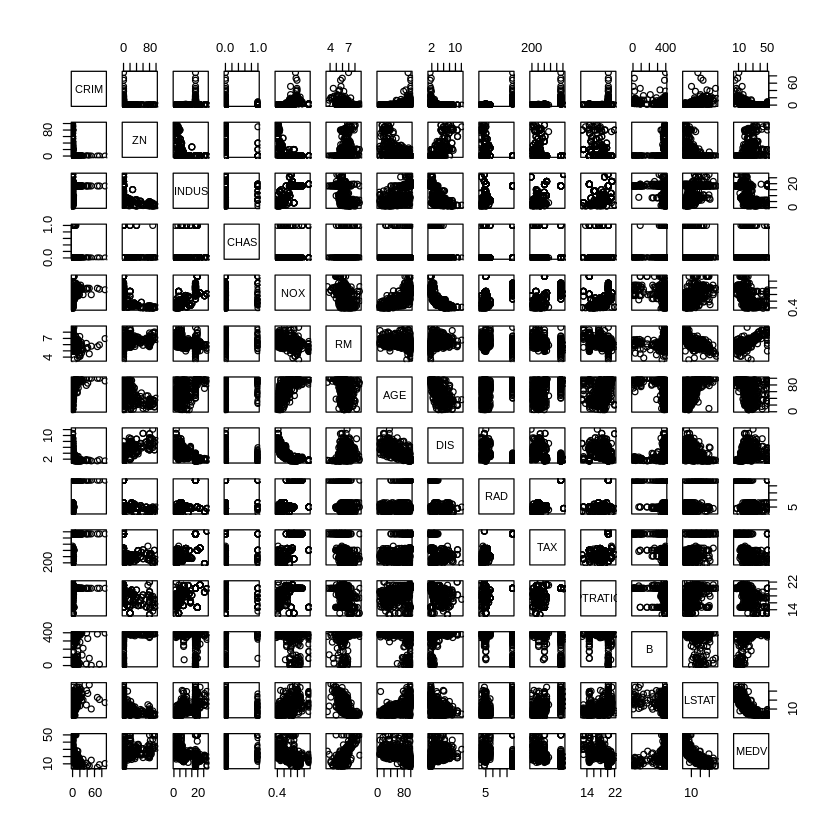

In [8]:
pairs(boston)

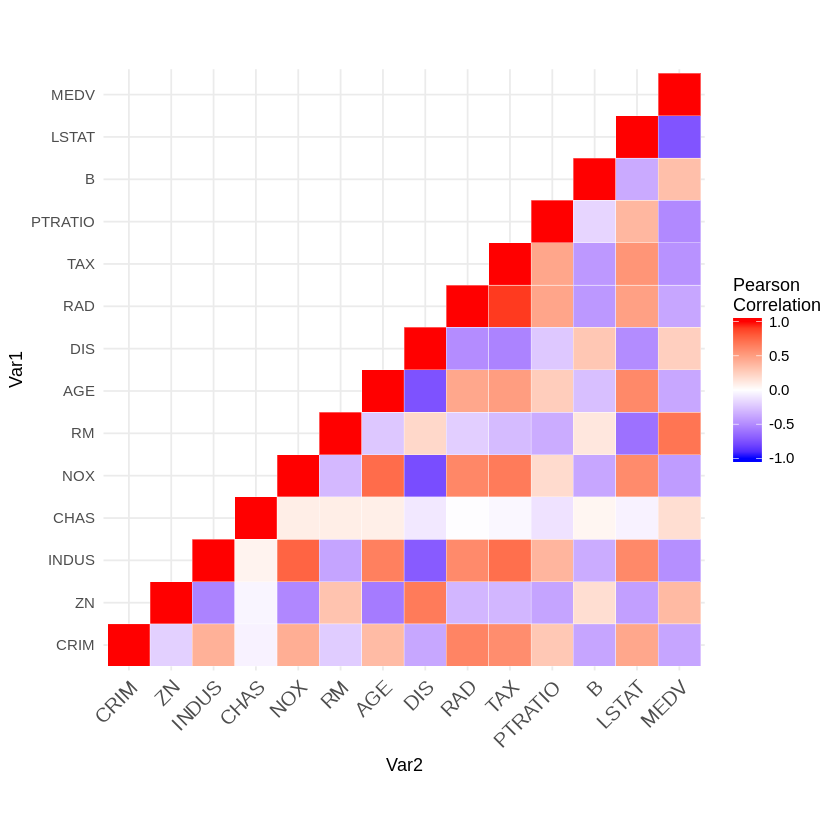

In [9]:

library(reshape2)
cormat = cor(boston)
cormat[lower.tri(cormat)] <- NA
melted_cormat <- melt(cormat, na.rm = T)
library(ggplot2)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

WE can see the correlations in pairs as they show the linear relations across variables.